In [75]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('airmiles.csv', index_col='Date', parse_dates=True, dayfirst=True)
df = df.asfreq('MS')

df.plot()

In [11]:
decomposition = seasonal_decompose(df, model='mul', period=12)

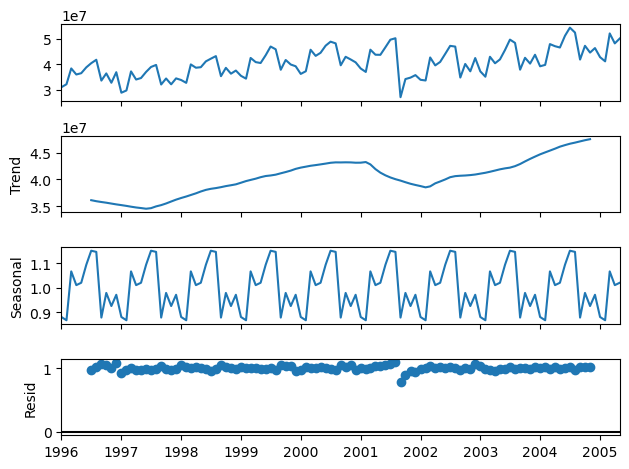

In [15]:
decomposition.plot()
plt.show()

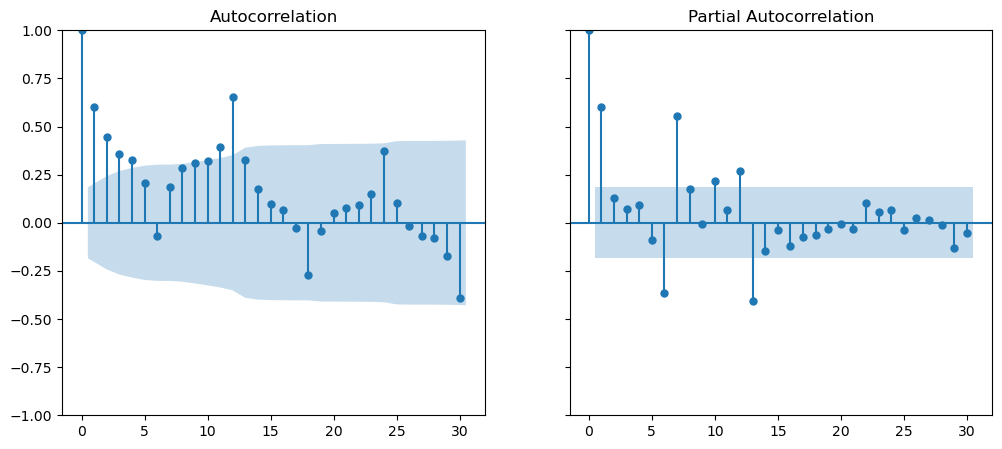

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

plot_acf(df, lags =30, ax=ax[0])
plot_pacf(df, lags=30, ax=ax[1])

plt.show()

In [101]:
df_train, df_test =  df[:-12], df[-12:]

In [102]:
df_train

airmiles
Date                
1996-01-01  30983174
1996-02-01  32147663
1996-03-01  38342975
1996-04-01  35969113
1996-05-01  36474391
...              ...
2004-01-01  39180114
2004-02-01  39736435
2004-03-01  47876012
2004-04-01  47050439
2004-05-01  46534130

[101 rows x 1 columns]

In [107]:
hw_model = ExponentialSmoothing(df_train, trend='mul', seasonal='mul', seasonal_periods=12).fit()

/home/salgado/.local/lib/python3.13/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [108]:
predictions = hw_model.forecast(steps=12)
predictions

2004-06-01    4.989814e+07
2004-07-01    5.232020e+07
2004-08-01    5.246731e+07
2004-09-01    4.147231e+07
2004-10-01    4.632250e+07
2004-11-01    4.366543e+07
2004-12-01    4.583298e+07
2005-01-01    4.142760e+07
2005-02-01    4.104454e+07
2005-03-01    5.053423e+07
2005-04-01    4.798055e+07
2005-05-01    4.852405e+07
Freq: MS, dtype: float64

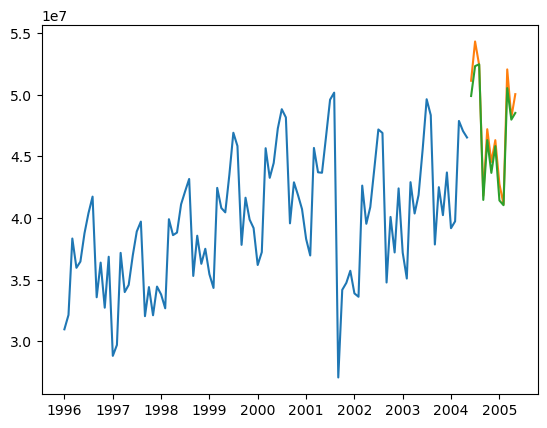

In [109]:
plt.plot(df_train, label='Train')
plt.plot(df_test, label='test')
plt.plot(predictions, label='predictions')

In [110]:
mean_absolute_error(predictions, df_test), mean_squared_error(predictions, df_test), mean_absolute_percentage_error(predictions, df_test)

(877575.1582596613, 1157029519354.6443, 0.018475268211000116)